In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [21]:
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt


In [9]:
company = "TSLA"
start_date = "2020-01-01"
end_date = "2023-12-30"

data = yf.download(company,start_date,end_date)

[*********************100%***********************]  1 of 1 completed


In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [27]:
df = pd.DataFrame(data)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB


In [31]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

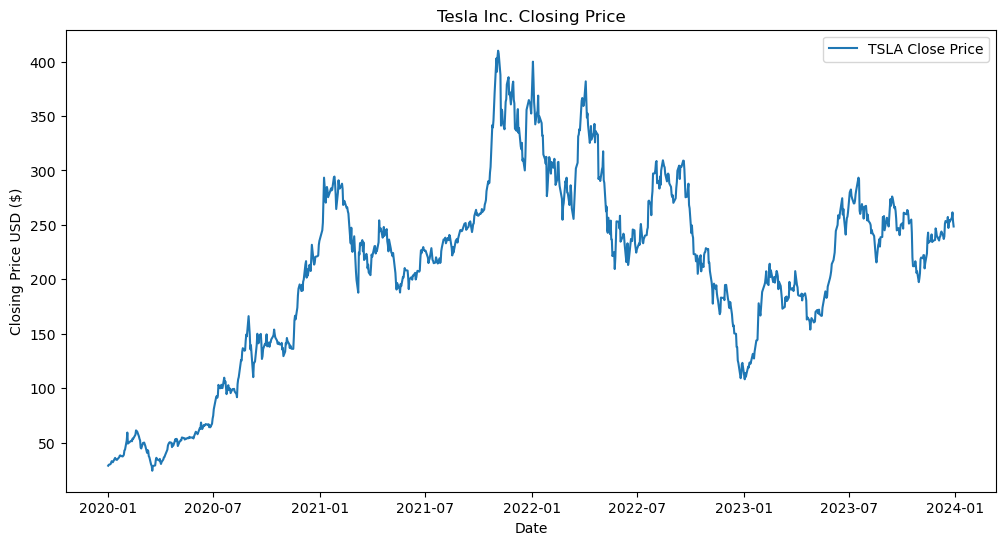

In [49]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='TSLA Close Price')
plt.title('Tesla Inc. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price USD ($)')
plt.legend()
plt.show()

In [55]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,209.199484,213.949515,204.067199,209.126371,209.126371,1.332191e+08
std,85.988785,87.686367,83.987942,85.797682,85.797682,8.862855e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,159.702499,161.952496,153.649998,160.210003,160.210003,7.707188e+07
50%,223.954994,229.125000,218.174995,223.489998,223.489998,1.071037e+08
75%,263.557503,268.260010,258.307510,262.967491,262.967491,1.577770e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


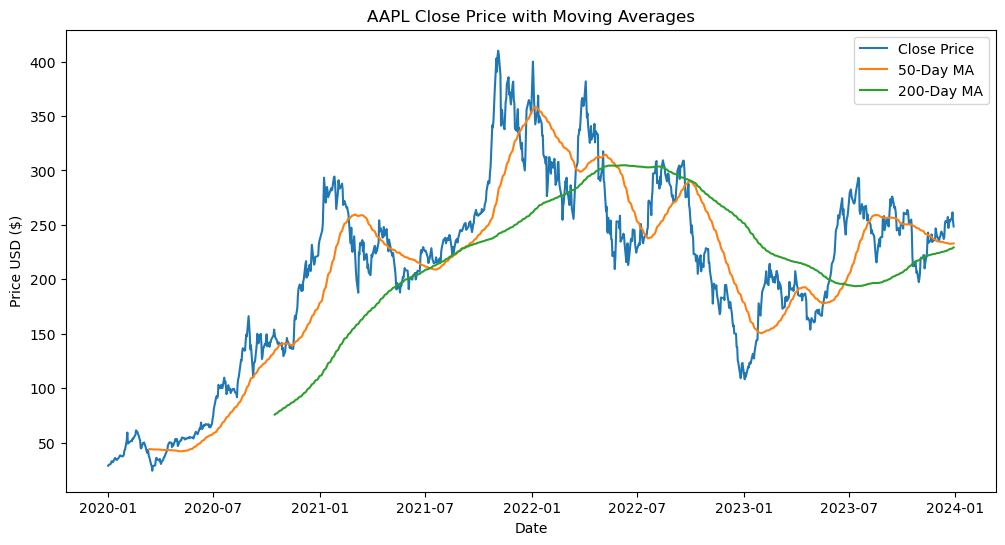

In [57]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['50_MA'], label='50-Day MA')
plt.plot(data['200_MA'], label='200-Day MA')
plt.title('AAPL Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend()
plt.show()

In [66]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
print(data['50_MA'])

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
                 ...    
2023-12-22    232.553000
2023-12-26    232.662800
2023-12-27    232.813200
2023-12-28    232.779799
2023-12-29    232.895800
Name: 50_MA, Length: 1006, dtype: float64


In [68]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998735,0.998240,0.996345,0.996345,-0.642844
High,0.998735,1.000000,0.998282,0.998355,0.998355,-0.633413
Low,0.998240,0.998282,1.000000,0.998537,0.998537,-0.652380
Close,0.996345,0.998355,0.998537,1.000000,1.000000,-0.640960
Adj Close,0.996345,0.998355,0.998537,1.000000,1.000000,-0.640960
Volume,-0.642844,-0.633413,-0.652380,-0.640960,-0.640960,1.000000


In [74]:
df['Price_Return'] = df['Close'].pct_change()
print(df['Price_Return'])


Date
2020-01-02         NaN
2020-01-03    0.029633
2020-01-06    0.019255
2020-01-07    0.038801
2020-01-08    0.049205
                ...   
2023-12-22   -0.007701
2023-12-26    0.016116
2023-12-27    0.018822
2023-12-28   -0.031594
2023-12-29   -0.018564
Name: Price_Return, Length: 1006, dtype: float64


In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Price_Return
Date,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205


In [80]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()
df['EMA'] = df['Close'].ewm(span=21).mean()
df['Volatility'] = df['Close'].rolling(window=21).std()

In [82]:
df.dropna(inplace=True)

In [92]:
X = df[['Open', 'High', 'Low', 'Volume', '50_MA', '200_MA', 'EMA', 'Volatility']]
y = df['Close']


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test)

In [104]:
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.3f}")

R-squared: 0.991


In [122]:
df['Date'] = df.index
df['Predicted'] = model.predict(X)

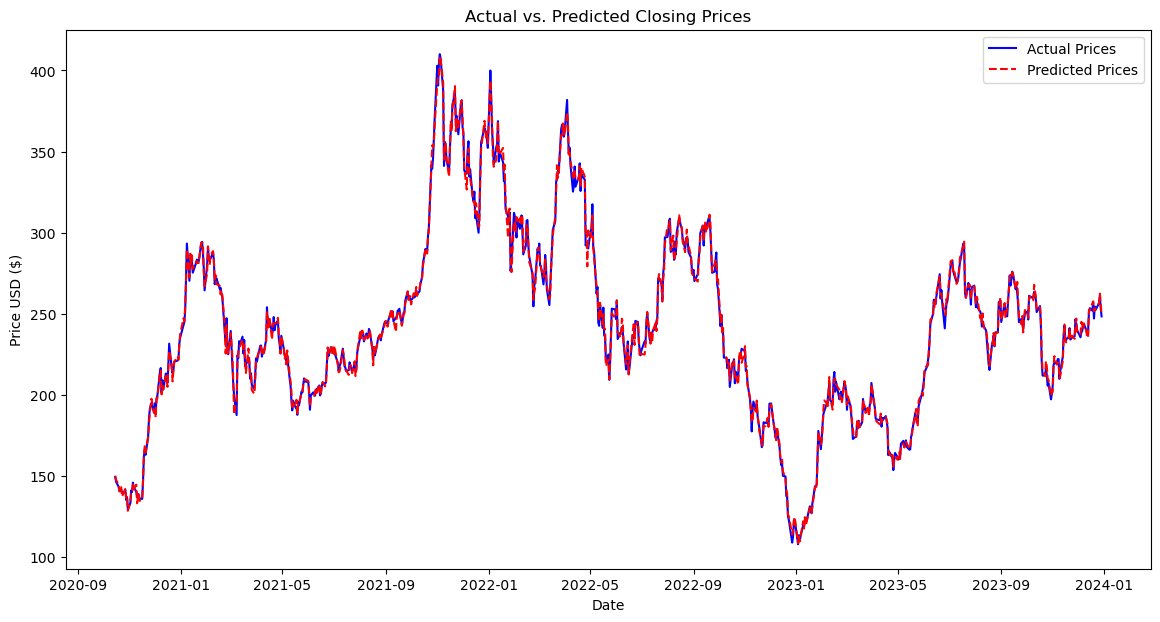

In [126]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='blue')
plt.plot(df['Date'], df['Predicted'], label='Predicted Prices', color='red', linestyle='--')
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend()
plt.show()